# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 입니다.
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [857]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [858]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제**를 위해 필요합니다.

In [859]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

## 2.데이터 전처리 

In [860]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [861]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [862]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    287 non-null    float64
 1   Income       288 non-null    float64
 2   Advertising  300 non-null    int64  
 3   Population   300 non-null    int64  
 4   Price        300 non-null    int64  
 5   ShelveLoc    300 non-null    object 
 6   Age          300 non-null    int64  
 7   Education    300 non-null    int64  
 8   Urban        300 non-null    object 
 9   US           300 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 23.6+ KB


In [863]:
x.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,287.000000,288.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,13.906667
std,14.551674,28.558597,6.569413,148.112339,22.149653,16.377098,2.601380
min,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,10.000000
25%,116.000000,42.000000,0.000000,136.250000,101.000000,39.000000,12.000000
50%,125.000000,69.000000,5.000000,278.000000,117.000000,54.000000,14.000000
75%,135.000000,93.000000,11.000000,400.000000,131.000000,65.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [864]:
x.isnull().sum()

CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [865]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,136.0,81.0,15,425,120,Good,67,10,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
295,140.0,29.0,0,105,91,Bad,43,16,Yes,No
296,121.0,90.0,0,150,108,Bad,75,16,Yes,No
297,131.0,47.0,7,90,118,Medium,47,12,Yes,Yes
298,131.0,73.0,13,455,132,Medium,62,17,Yes,Yes


In [866]:
# income = 평균값으로 채우기
income_mean = round(x['Income'].mean(), 1)
x['Income'].fillna(income_mean, inplace=True)
x.isna().sum()

CompPrice      13
Income          0
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [867]:
x.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,114.0,68.7,0,97,125,Medium,29,12,Yes,No
3,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


In [868]:
# CompPrice = 선형보간법으로 채우기
x.interpolate(method='linear', inplace=True)
x.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [869]:
x.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,114.0,68.7,0,97,125,Medium,29,12,Yes,No
3,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


- Income의 경우 데이터가 전체적으로 균등한 것을 확인해서 평균값으로 채워넣음
- CompPrice의 경우 주어진 값들을 지나는 직선상에서 결측치를 채워넣기 위해 선형보간법을 사용함

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [870]:
x.loc[x['ShelveLoc']=='Bad', 'ShelveLoc'] = 0
x.loc[x['ShelveLoc']=='Medium', 'ShelveLoc'] = 1
x.loc[x['ShelveLoc']=='Good', 'ShelveLoc'] = 2

x.loc[x['Urban']=='No', 'Urban'] = 0
x.loc[x['Urban']=='Yes', 'Urban'] = 1

x.loc[x['US']=='No', 'US'] = 0
x.loc[x['US']=='Yes', 'US'] = 1

In [871]:
x.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,139.0,111.0,5,310,132,0,62,13,1,1
1,143.0,21.0,5,81,160,1,67,12,0,1
2,114.0,68.7,0,97,125,1,29,12,1,0
3,119.0,88.0,10,170,101,1,61,13,1,1
4,136.0,81.0,15,425,120,2,67,10,1,1


In [872]:
# col_dummies = ['ShelveLoc', 'Urban', 'US']
# data_test = pd.get_dummies(data, columns=col_dummies, drop_first=True)

### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.

In [873]:
x['PoPrice'] = x['Price']/x['Population']
x.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PoPrice
0,139.0,111.0,5,310,132,0,62,13,1,1,0.425806
1,143.0,21.0,5,81,160,1,67,12,0,1,1.975309
2,114.0,68.7,0,97,125,1,29,12,1,0,1.288660
3,119.0,88.0,10,170,101,1,61,13,1,1,0.594118
4,136.0,81.0,15,425,120,2,67,10,1,1,0.282353


In [874]:
x['PoPrice'] = round(x['PoPrice'], 2)
x.tail(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PoPrice
295,140.0,29.0,0,105,91,0,43,16,1,0,0.87
296,121.0,90.0,0,150,108,0,75,16,1,0,0.72
297,131.0,47.0,7,90,118,1,47,12,1,1,1.31
298,131.0,73.0,13,455,132,1,62,17,1,1,0.29
299,135.0,63.0,15,213,134,1,32,10,1,1,0.63


- 지역 인구 대비 지역별 판매가격의 비율을 나타낸 'PoPrice'를 추가로 도출함

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [875]:
from sklearn.model_selection import train_test_split

In [876]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [877]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_trainsc = scaler.transform(x_train)

In [878]:
# max = x_train
# x_trainsc = (x_train - x_train.min())/(max-x_train.min())
# x_valsc = (x_val - x_train.min())/(max-x_train.min())

In [879]:
x_trainsc.max(), x_trainsc.min()

(1.0, 0.0)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [880]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Linear Regression 모델링

In [881]:
model = LinearRegression()

In [882]:
model.fit(x_train, y_train)

LinearRegression()

In [883]:
y_pred = model.predict(x_val)

In [884]:
print('MAE: ', mean_absolute_error(y_val, y_pred))
print('R2: ', r2_score(y_val, y_pred))

MAE:  0.9871680984640497
R2:  0.8234201308224465


#### (2) Decision Tree 모델링

In [885]:
model2 = DecisionTreeRegressor(max_depth=3, random_state=2022)

In [886]:
model2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=2022)

In [887]:
y_pred2 = model2.predict(x_val)

In [888]:
print('MAE: ', mean_absolute_error(y_val, y_pred2))
print('R2: ', r2_score(y_val, y_pred2))

MAE:  2.071992660452159
R2:  0.20227325566634435


#### (3) KNN 모델링

In [889]:
model3 = KNeighborsRegressor(n_neighbors=3)

In [890]:
model3.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [891]:
y_pred3 = model3.predict(x_val)

In [892]:
print('MAE: ', mean_absolute_error(y_val, y_pred3))
print('R2: ', r2_score(y_val, y_pred3))

MAE:  2.342888888888889
R2:  -0.028214811470694823


#### (4) SVM 모델링

In [893]:
model4 = SVR()

In [894]:
model4.fit(x_train, y_train)

SVR()

In [895]:
y_pred4 = model4.predict(x_val)

In [896]:
print('MAE: ', mean_absolute_error(y_val, y_pred4))
print('R2: ', r2_score(y_val, y_pred4))

MAE:  2.1228173489634123
R2:  0.1502090651318556


#### (5) Random Forest 모델링

In [897]:
model5 = RandomForestRegressor(random_state=2022)

In [898]:
model5.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [899]:
y_pred5 = model5.predict(x_val)

In [900]:
print('MAE: ', mean_absolute_error(y_val, y_pred5))
print('R2: ', r2_score(y_val, y_pred5))

MAE:  1.530432222222222
R2:  0.578112723890323


#### (6) XGB 모델링

In [901]:
x_gb = x
x_gb['ShelveLoc'] = x_gb['ShelveLoc'].astype(int)
x_gb['Urban'] = x_gb['Urban'].astype(int)
x_gb['US'] = x_gb['US'].astype(int)

In [902]:
# 기존의 y_train, y_val과 겹치지 않기 위해 사용하지는 않으나 새로 정의
x_traingb, x_valgb, y_traingb, y_valgb = train_test_split(x_gb, y, test_size=0.3, random_state=2022)

In [903]:
model6 = XGBRegressor(objective='reg:squarederror', eval_metric='mlogloss')

In [904]:
model6.fit(x_traingb, y_train)

XGBRegressor(eval_metric='mlogloss', objective='reg:squarederror')

In [905]:
y_pred6 = model6.predict(x_valgb)

In [906]:
print('MAE: ', mean_absolute_error(y_val, y_pred6))
print('R2: ', r2_score(y_val, y_pred6))

MAE:  1.3241909724341498
R2:  0.6666167082185792


## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [907]:
import tensorflow as tf
from tensorflow import keras

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [908]:
x_trainsc.shape, y_train.shape

((210, 11), (210,))

* 모델1 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


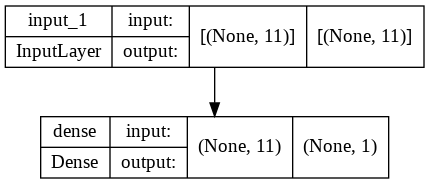

In [909]:
keras.backend.clear_session()

model7 = keras.models.Sequential()

model7.add(keras.layers.Input(shape=(11,)))
model7.add(keras.layers.Dense(1))

model7.compile(loss='mae', optimizer='nadam')

model7.summary()
tf.keras.utils.plot_model(model7, show_shapes=True)

* 모델2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


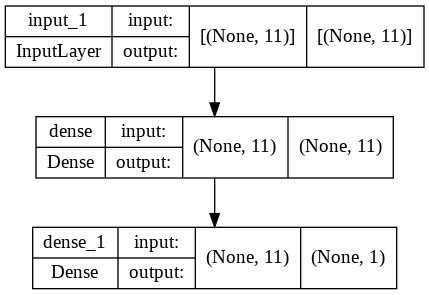

In [910]:
keras.backend.clear_session()

a = keras.layers.Input(shape=(11,))
h = keras.layers.Dense(11, activation='relu')(a)
b = keras.layers.Dense(1, activation='relu')(h)

model8 = keras.models.Model(a,b)

model8.compile(loss='mae', optimizer='nadam')

model8.summary()
tf.keras.utils.plot_model(model8, show_shapes=True)

* 모델3

In [911]:
x_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'PoPrice'],
      dtype='object')

In [912]:
x_trainsc = pd.DataFrame(x_trainsc, columns=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'PoPrice'])
type(x_trainsc)

pandas.core.frame.DataFrame

In [913]:
x_trainsc.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,PoPrice
0,0.617978,0.131313,0.551724,0.709350,0.415493,0.5,0.800000,0.000,1.0,1.0,0.018681
1,0.337079,0.585859,0.655172,0.705285,0.471831,1.0,0.600000,0.875,1.0,1.0,0.020879
2,0.303371,0.434343,0.344828,0.113821,0.366197,0.5,0.581818,0.750,1.0,1.0,0.149451
3,0.539326,0.868687,0.000000,0.186992,0.415493,0.5,0.636364,0.250,1.0,0.0,0.100000
4,0.325843,0.848485,0.000000,0.067073,0.415493,0.5,0.836364,0.625,1.0,0.0,0.249451


In [914]:
x_trainsc.shape

(210, 11)

In [915]:
# 가격/사람/회사 의 큰 카테고리 3개로 분할
train_price = x_trainsc.loc[:, ['CompPrice', 'Income', 'Price', 'PoPrice']]
train_pop = x_trainsc.loc[:, ['Population', 'Age', 'Education']]
train_co = x_trainsc.loc[:, ['Advertising', 'ShelveLoc', 'Urban', 'US']]

val_price = x_val.loc[:, ['CompPrice', 'Income', 'Price', 'PoPrice']]
val_pop = x_val.loc[:, ['Population', 'Age', 'Education']]
val_co = x_val.loc[:, ['Advertising', 'ShelveLoc', 'Urban', 'US']]

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 11)           55          ['input_2[0][0]']                
                                                                                              

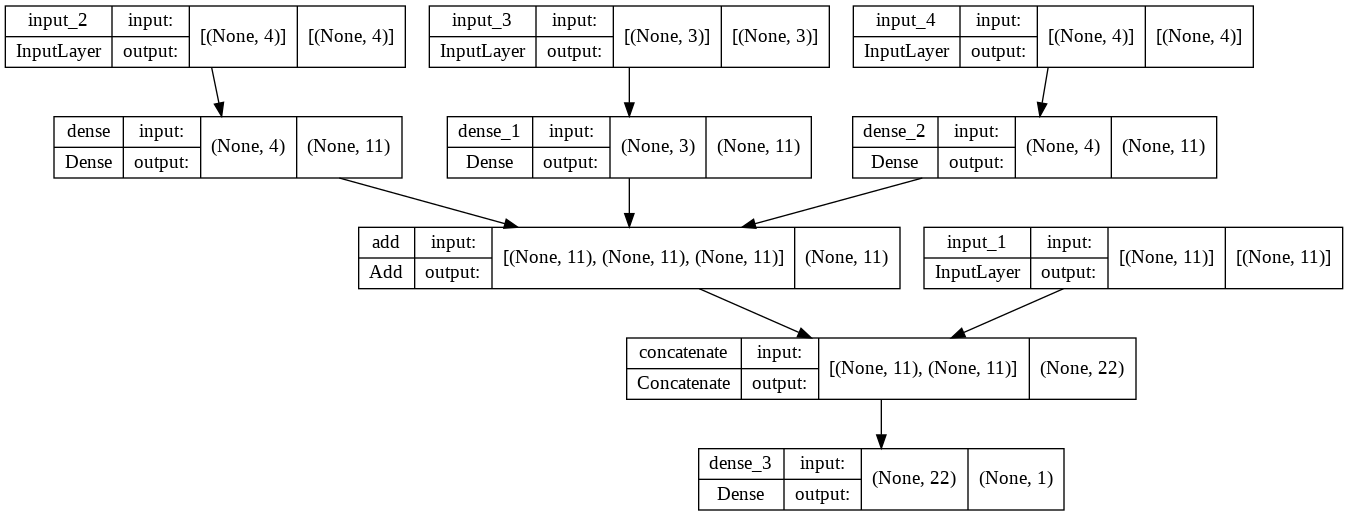

In [916]:
keras.backend.clear_session()

fu = keras.layers.Input(shape=(11,))

a1 = keras.layers.Input(shape=(4,))
h_pr = keras.layers.Dense(11, activation='relu')(a1)
a2 = keras.layers.Input(shape=(3,))
h_pop = keras.layers.Dense(11, activation='relu')(a2)
a3 = keras.layers.Input(shape=(4,))
h_co = keras.layers.Dense(11, activation='relu')(a3)

ad = keras.layers.Add()([h_pr, h_pop, h_co])
cl = keras.layers.Concatenate()([fu, ad])
b = keras.layers.Dense(1, activation='relu')(cl)

input_list = [fu, a1, a2, a3]
model9 = keras.models.Model(input_list,b)

model9.compile(loss='mae', optimizer='nadam')

model9.summary()
tf.keras.utils.plot_model(model9, show_shapes=True)

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [917]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

In [918]:
model7.fit(x_trainsc, y_train, validation_split=0.15, epochs=30, verbose=1, callbacks=[es])

Epoch 1/30
6/6 [==============================] - 1s 39ms/step - loss: 6.7031 - val_loss: 6.6953
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 6.6754 - val_loss: 6.6658
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 6.6447 - val_loss: 6.6334
Epoch 4/30
6/6 [==============================] - 0s 9ms/step - loss: 6.6120 - val_loss: 6.5997
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 6.5779 - val_loss: 6.5652
Epoch 6/30
6/6 [==============================] - 0s 10ms/step - loss: 6.5433 - val_loss: 6.5303
Epoch 7/30
6/6 [==============================] - 0s 8ms/step - loss: 6.5084 - val_loss: 6.4951
Epoch 8/30
6/6 [==============================] - 0s 9ms/step - loss: 6.4735 - val_loss: 6.4599
Epoch 9/30
6/6 [==============================] - 0s 8ms/step - loss: 6.4382 - val_loss: 6.4245
Epoch 10/30
6/6 [==============================] - 0s 8ms/step - loss: 6.4029 - val_loss: 6.3892
Epoch 11/30
6/6 [====================

In [919]:
model8.fit(x_trainsc, y_train, validation_split=0.15, epochs=30, verbose=1, callbacks=[es])

Epoch 1/30
6/6 [==============================] - 1s 33ms/step - loss: 7.6139 - val_loss: 7.7759
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 7.6108 - val_loss: 7.7731
Epoch 3/30
6/6 [==============================] - 0s 8ms/step - loss: 7.6051 - val_loss: 7.7652
Epoch 4/30
6/6 [==============================] - 0s 8ms/step - loss: 7.5953 - val_loss: 7.7455
Epoch 5/30
6/6 [==============================] - 0s 8ms/step - loss: 7.5707 - val_loss: 7.7050
Epoch 6/30
6/6 [==============================] - 0s 9ms/step - loss: 7.5182 - val_loss: 7.6381
Epoch 7/30
6/6 [==============================] - 0s 10ms/step - loss: 7.4406 - val_loss: 7.5460
Epoch 8/30
6/6 [==============================] - 0s 9ms/step - loss: 7.3465 - val_loss: 7.4428
Epoch 9/30
6/6 [==============================] - 0s 10ms/step - loss: 7.2465 - val_loss: 7.3439
Epoch 10/30
6/6 [==============================] - 0s 9ms/step - loss: 7.1513 - val_loss: 7.2456
Epoch 11/30
6/6 [===================

In [920]:
train_list = [x_trainsc, train_price, train_pop, train_co]
val_list = [x_val, val_price, val_pop, val_co]

In [921]:
model9.fit(train_list, y_train, validation_split=0.15, epochs=30, verbose=1, callbacks=[es])

Epoch 1/30
6/6 [==============================] - 1s 50ms/step - loss: 7.2697 - val_loss: 7.2550
Epoch 2/30
6/6 [==============================] - 0s 11ms/step - loss: 7.2058 - val_loss: 7.1698
Epoch 3/30
6/6 [==============================] - 0s 10ms/step - loss: 7.1313 - val_loss: 7.0739
Epoch 4/30
6/6 [==============================] - 0s 11ms/step - loss: 7.0488 - val_loss: 6.9677
Epoch 5/30
6/6 [==============================] - 0s 11ms/step - loss: 6.9575 - val_loss: 6.8540
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: 6.8531 - val_loss: 6.7343
Epoch 7/30
6/6 [==============================] - 0s 11ms/step - loss: 6.7368 - val_loss: 6.6102
Epoch 8/30
6/6 [==============================] - 0s 14ms/step - loss: 6.6107 - val_loss: 6.4826
Epoch 9/30
6/6 [==============================] - 0s 11ms/step - loss: 6.4802 - val_loss: 6.3511
Epoch 10/30
6/6 [==============================] - 0s 11ms/step - loss: 6.3492 - val_loss: 6.2174
Epoch 11/30
6/6 [============

## 5.성능 비교

* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [922]:
# 가변수화 코드 실행


In [923]:
# NAN 채우기


In [924]:
# 경쟁사와 가격 차 변수 만들기


In [925]:
# 스케일링


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.